## ORGANS: Cause of Death

This notebook contains analysis of the cause of death for donors from 2018 - 2021. It also includes analysis of major causes of death by region in 2020.

---

### Initialize environment

In [2]:
library(tidyverse)

In [3]:
root_path     <- here::here()
data_path     <- paste0(root_path, "/01_data")
analysis_path <- paste0(root_path, "/02_analysis")

In [4]:
setwd(data_path)

transplant <- readRDS("clean/transplant_clean.rds")

state_code_mapping <- read.csv("raw/00_misc/state_code_mapping_20221022.csv")

setwd(analysis_path)

---

### Analyze donor cause of death

In [5]:
transplant %>%
  filter(REC_TX_DT_YEAR %in% 2018:2021) %>%
  count(DON_DEATH_CIRCUM, DON_DEATH_MECH) %>%
  pivot_wider(DON_DEATH_MECH, names_from = DON_DEATH_CIRCUM, names_prefix = "COD_", values_from = n)

DON_DEATH_MECH,COD_,COD_1: MVA,COD_2: SUICIDE,COD_3: HOMICIDE,COD_4: CHILD-ABUSE,COD_5: NON-MVA,COD_6: DEATH FROM NATURAL CAUSES,COD_997: NONE OF THE ABOVE
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
,1701,NA,NA,NA,NA,NA,NA,NA
1: DROWNING,NA,11,6,NA,1,127,7,17
11: INTRACRANIAL HEMORRHAGE/STROKE,NA,104,2,7,NA,126,7337,827
12: DEATH FROM NATURAL CAUSES,NA,6,3,NA,NA,7,973,14
3: DRUG INTOXICATION,NA,3,261,3,NA,3151,152,1805
4: ASPHYXIATION,NA,8,1198,22,NA,285,159,82
5: CARDIOVASCULAR,NA,48,22,11,1,208,4293,873
7: GUNSHOT WOUND,NA,2,1583,1164,NA,151,NA,4
9: BLUNT INJURY,NA,3843,83,243,6,1329,2,2


In [6]:
codByYearState <- transplant %>%
  filter(REC_TX_DT_YEAR %in% 2018:2021) %>%
  count(YEAR = REC_TX_DT_YEAR, DON_HOSPITAL_STATE, DON_DEATH_MECH, sort = T, name = "N_DONORS") %>%
  group_by(YEAR, DON_HOSPITAL_STATE) %>%
  mutate(PCT_OF_DONORS = N_DONORS / sum(N_DONORS)) %>%
  filter(rank(-N_DONORS) <= 5) %>%
  ungroup() %>%
  arrange(YEAR, DON_HOSPITAL_STATE, -N_DONORS)

write.csv(x = codByYearState,
          file = "output/tables/table6-top5_cause_of_death_by_state_year.csv",
          row.names = F)

codByYearState %>% head()

YEAR,DON_HOSPITAL_STATE,DON_DEATH_MECH,N_DONORS,PCT_OF_DONORS
<dbl>,<chr>,<chr>,<int>,<dbl>
2018,AK,5: CARDIOVASCULAR,4,0.2105263
2018,AK,11: INTRACRANIAL HEMORRHAGE/STROKE,3,0.1578947
2018,AK,3: DRUG INTOXICATION,3,0.1578947
2018,AK,12: DEATH FROM NATURAL CAUSES,2,0.1052632
2018,AK,7: GUNSHOT WOUND,2,0.1052632
2018,AK,9: BLUNT INJURY,2,0.1052632


In [7]:
codByYearRegion <- transplant %>%
  filter(REC_TX_DT_YEAR %in% 2018:2021) %>%
  left_join(state_code_mapping %>% select(STATE_CODE, STATE_REGION), 
            by = c("DON_HOSPITAL_STATE" = "STATE_CODE")) %>%
  count(YEAR = REC_TX_DT_YEAR, STATE_REGION, DON_DEATH_MECH, sort = T, name = "N_DONORS") %>%
  group_by(YEAR, STATE_REGION) %>%
  mutate(PCT_OF_DONORS = N_DONORS / sum(N_DONORS)) %>%
  filter(rank(-N_DONORS) <= 5) %>%
  ungroup() %>%
  arrange(YEAR, STATE_REGION, -N_DONORS)

write.csv(x = codByYearRegion,
          file = "output/tables/table6-top5_cause_of_death_by_region_year.csv",
          row.names = F)

codByYearRegion %>% head()

YEAR,STATE_REGION,DON_DEATH_MECH,N_DONORS,PCT_OF_DONORS
<dbl>,<chr>,<chr>,<int>,<dbl>
2018,Midwest,11: INTRACRANIAL HEMORRHAGE/STROKE,431,0.2604230
2018,Midwest,9: BLUNT INJURY,282,0.1703927
2018,Midwest,3: DRUG INTOXICATION,281,0.1697885
2018,Midwest,5: CARDIOVASCULAR,273,0.1649547
2018,Midwest,7: GUNSHOT WOUND,135,0.0815710
2018,Northeast,11: INTRACRANIAL HEMORRHAGE/STROKE,298,0.2675045


In [8]:
codByYear <- transplant %>%
  filter(REC_TX_DT_YEAR %in% 2018:2021) %>%
  count(YEAR = REC_TX_DT_YEAR, DON_DEATH_MECH, sort = T, name = "N_DONORS") %>%
  group_by(YEAR) %>%
  mutate(PCT_OF_DONORS = N_DONORS / sum(N_DONORS)) %>%
  filter(rank(-N_DONORS) <= 10) %>%
  ungroup() %>%
  arrange(YEAR, -N_DONORS)

write.csv(x = codByYear,
          file = "output/tables/table6-top10_cause_of_death_by_year.csv",
          row.names = F)

codByYear %>% head()

YEAR,DON_DEATH_MECH,N_DONORS,PCT_OF_DONORS
<dbl>,<chr>,<int>,<dbl>
2018,11: INTRACRANIAL HEMORRHAGE/STROKE,2045,0.26603356
2018,9: BLUNT INJURY,1348,0.17536100
2018,5: CARDIOVASCULAR,1258,0.16365292
2018,3: DRUG INTOXICATION,1093,0.14218811
2018,7: GUNSHOT WOUND,688,0.08950176
2018,4: ASPHYXIATION,451,0.05867048


In [9]:
transplant %>%
  filter(!is.na(DON_HOSPITAL_STATE)) %>%
  filter(REC_TX_DT_YEAR %in% 2018:2021) %>%
  count(YEAR = REC_TX_DT_YEAR)

YEAR,n
<dbl>,<int>
2018,7348
2019,7900
2020,7979
2021,8241


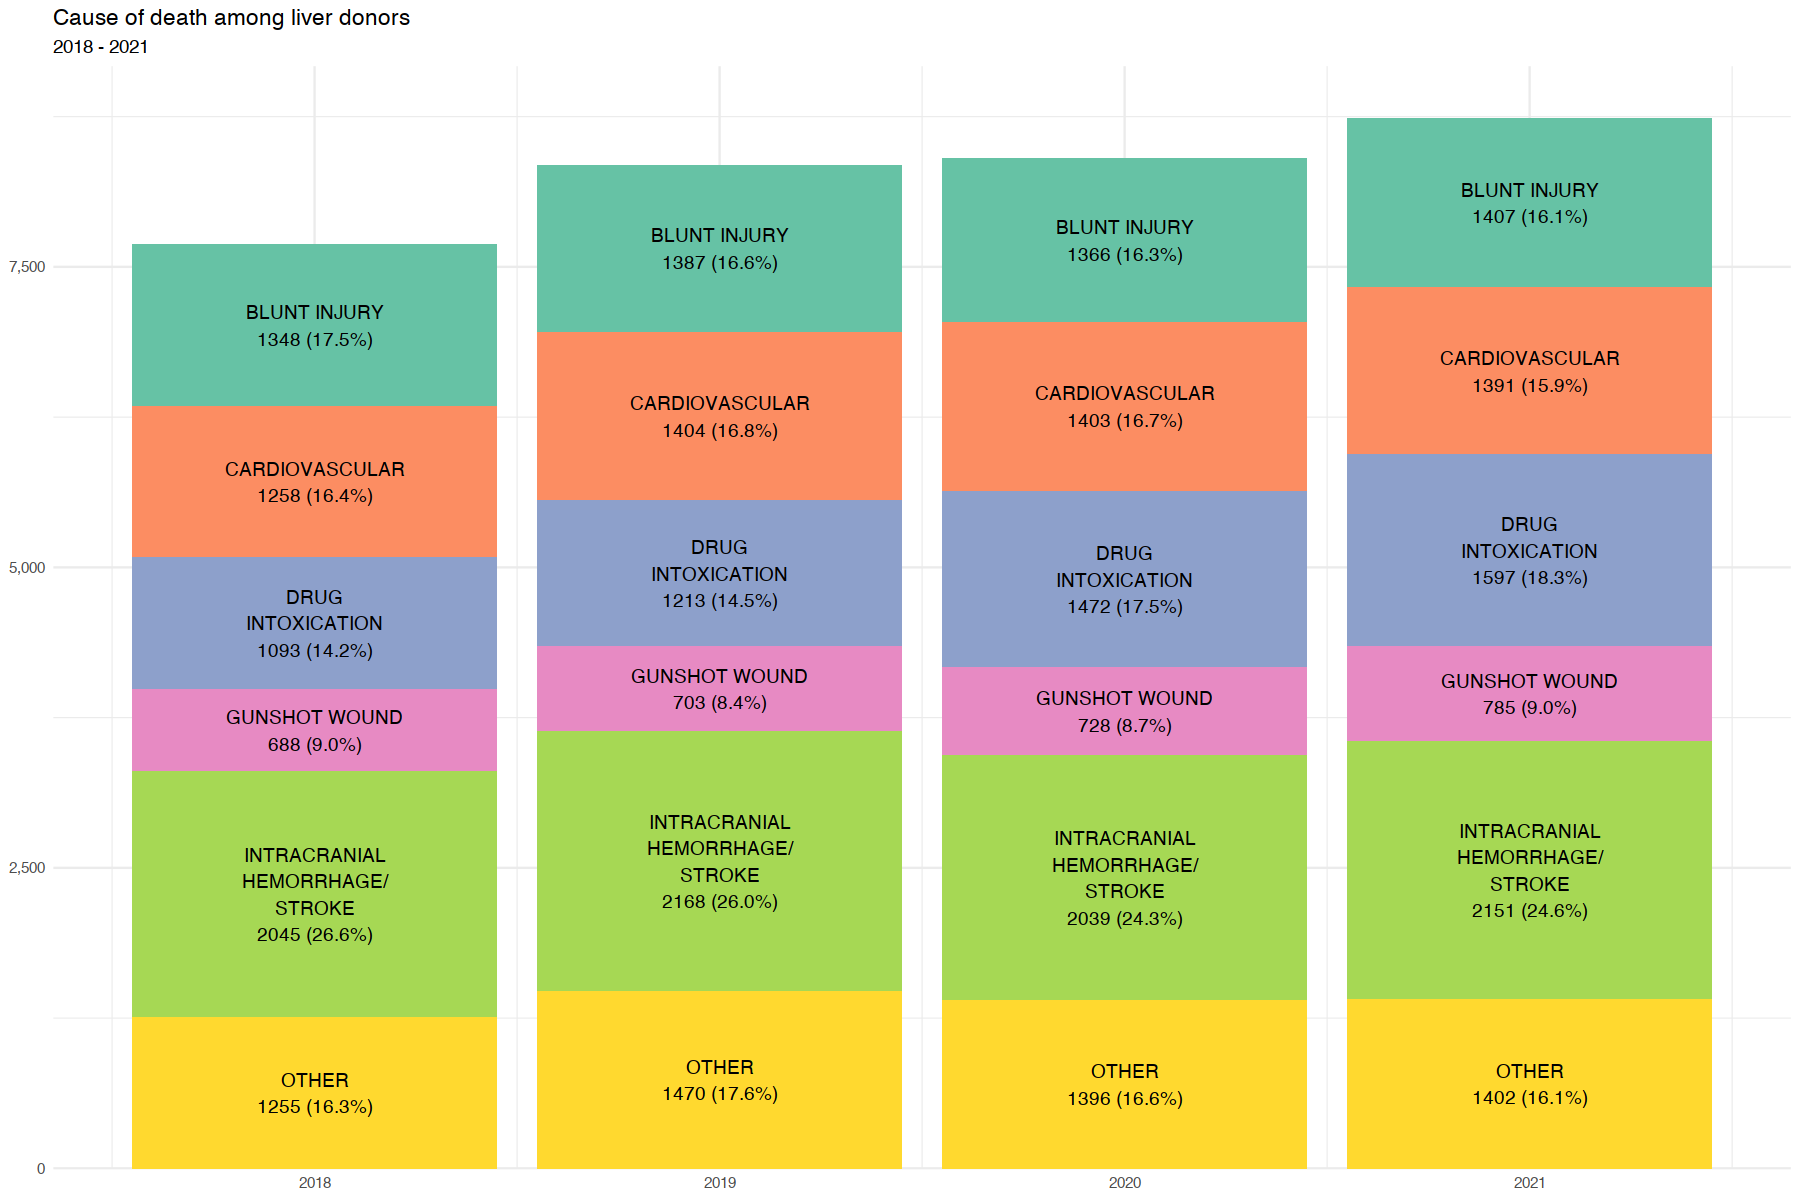

In [10]:
options(repr.plot.width = 15, repr.plot.height = 10)

codByYear.plot <- transplant %>%
  filter(REC_TX_DT_YEAR %in% 2018:2021) %>%
  count(YEAR = REC_TX_DT_YEAR, DON_DEATH_MECH, sort = T, name = "N_DONORS") %>%
  group_by(YEAR) %>%
  mutate(RANK = rank(-N_DONORS)) %>%
  ungroup() %>%
  mutate(DON_DEATH_MECH = if_else(RANK <= 5, gsub("^[0-9]+: ", "", DON_DEATH_MECH), "OTHER")) %>%
  count(YEAR, DON_DEATH_MECH, wt = N_DONORS, name = "N_DONORS") %>%
  group_by(YEAR) %>%
  mutate(PCT = N_DONORS / sum(N_DONORS)) %>%
  ungroup() %>%
  mutate(LABEL = glue::glue("{stringr::str_wrap(DON_DEATH_MECH, 15)}\n{N_DONORS} ({scales::percent(PCT, accuracy = 0.1)})")) %>%
  ggplot(aes(x = YEAR, y = N_DONORS, fill = DON_DEATH_MECH)) +
  geom_col() +
  geom_text(aes(label = LABEL),
            position = position_stack(vjust = 0.5)) +
  scale_x_continuous(name = NULL) +
  scale_y_continuous(name = NULL, labels = scales::comma, expand = expansion(mult = c(0, 0.05))) +
  scale_fill_brewer(palette = "Set2") +
  labs(title = "Cause of death among liver donors",
       subtitle = "2018 - 2021") +
  theme_minimal() +
  theme(legend.position = "none")

ggsave("output/figures/fig6-cause_of_death_by_year.png",
       codByYear.plot, device = "png",
       width = 15, height = 10, unit = "in", dpi = 500)

codByYear.plot

The number of donors increased from 7900 to 8241 from 2019 to 2021 (+341, +4.3%)

"DRUG INTOXICATION" donors increased from 1213 to 1597 (+384, +31.6%) and was the only category other than "GUNSHOT WOUND" to see increases from 2019 to 2021 (everything else declined), indicating drug overdose deaths was the main driver in the increase in donors from 2019 to 2021.

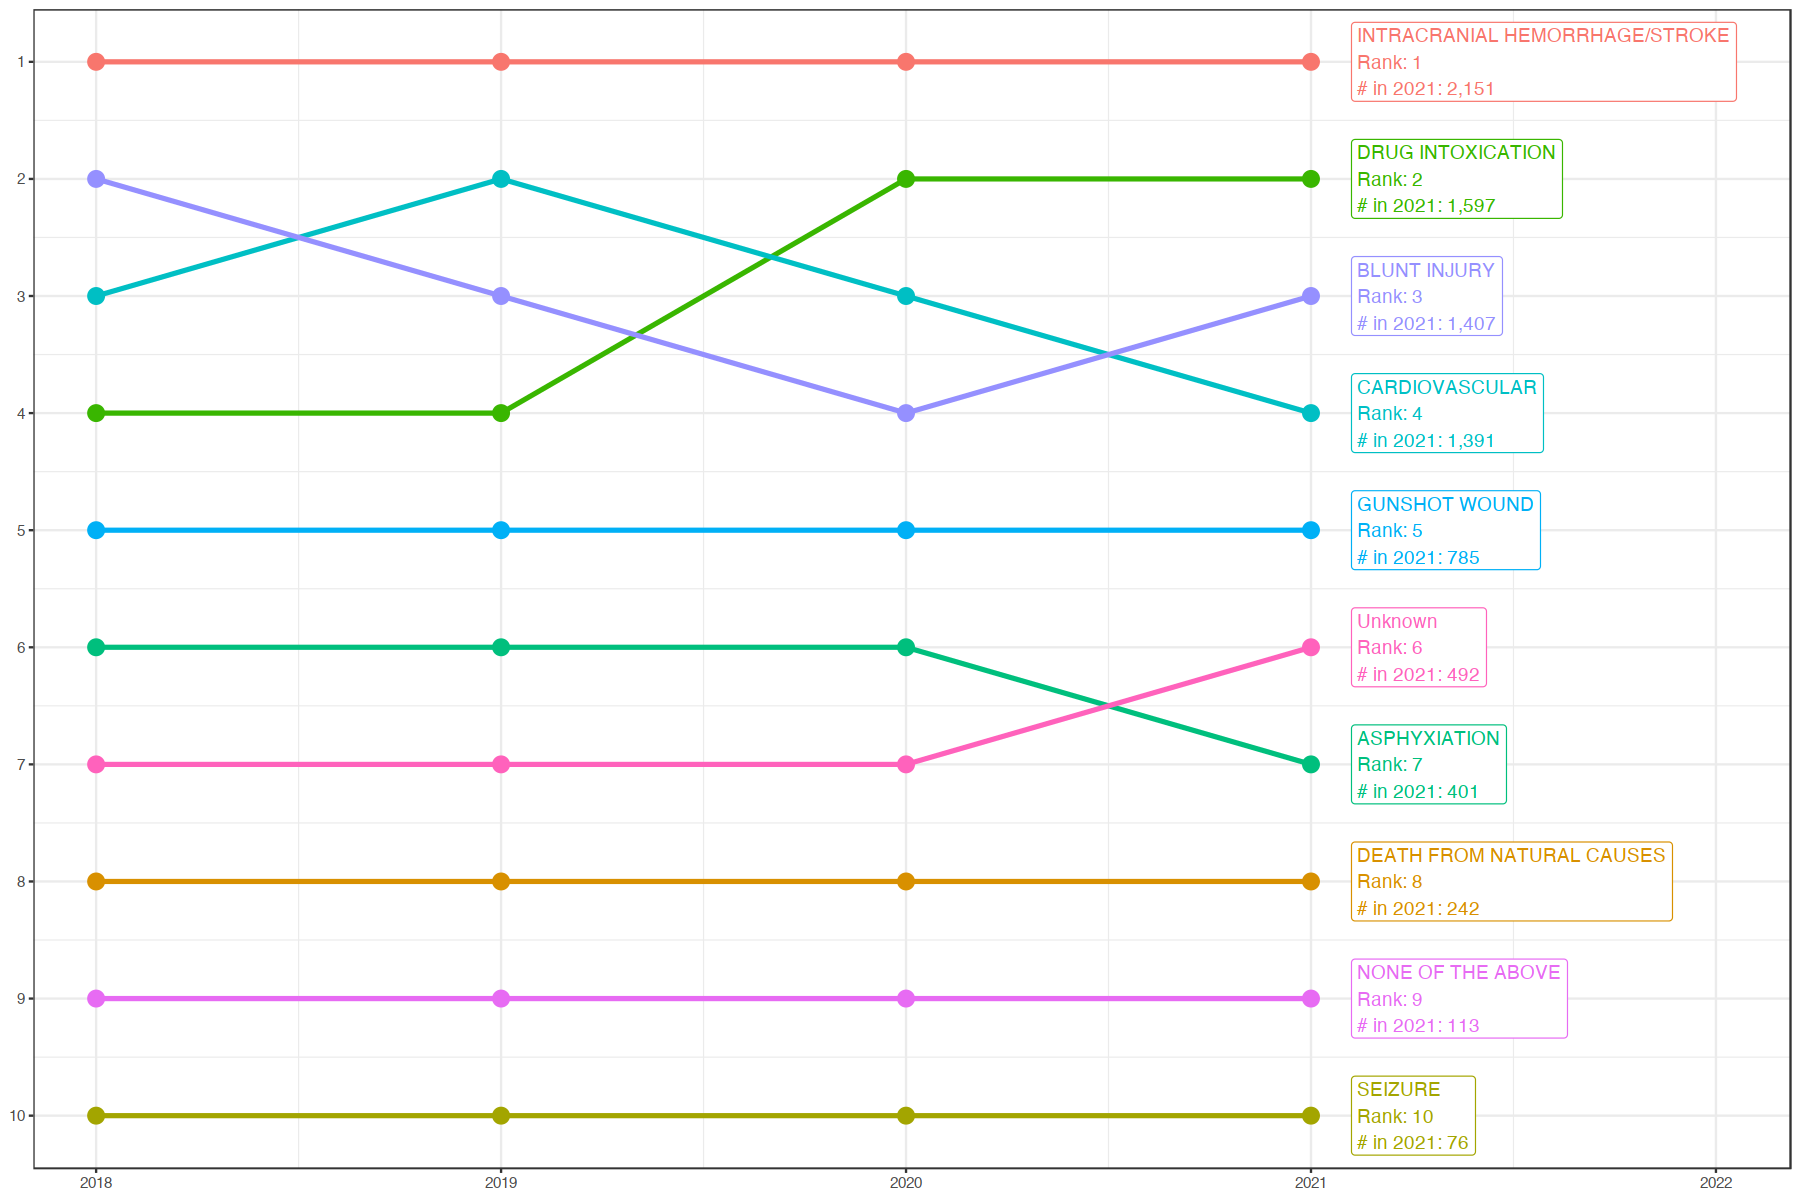

In [11]:
options(repr.plot.width = 15, repr.plot.height = 10)

codByYear.plot2 <- transplant %>%
  mutate(DON_DEATH_MECH = if_else(DON_DEATH_MECH == "", "Unknown", DON_DEATH_MECH)) %>%
  filter(REC_TX_DT_YEAR %in% 2018:2021) %>%
  count(YEAR = REC_TX_DT_YEAR, DON_DEATH_MECH, sort = T, name = "N_DONORS") %>%
  group_by(YEAR) %>%
  mutate(RANK = rank(-N_DONORS)) %>%
  ungroup() %>%
  filter(RANK <= 10) %>%
  group_by(DON_DEATH_MECH) %>%
  mutate(to_show = n() == 5) %>%
  ungroup() %>%
  mutate(label = case_when(YEAR == 2021 ~ paste0(gsub("[0-9]+: ", "", DON_DEATH_MECH),
                                                 "\nRank: ", RANK,
                                                 "\n# in 2021: ", scales::comma(N_DONORS, accuracy = 1)))) %>%
  ggplot(aes(x = YEAR, y = RANK, color = DON_DEATH_MECH)) +
  geom_line(size = 1.1) +
  geom_point(size = 4) + 
  geom_label(aes(label = label), na.rm = T,
             hjust = 0, nudge_x = 0.1) +
  scale_x_continuous(name = NULL, expand = expansion(mult = c(0.05, 0.35))) +
  scale_y_reverse(name = NULL, breaks = 1:10) +
  theme_bw() +
  theme(legend.position = "none")

ggsave("output/figures/fig6-cause_of_death_by_rank_year.png",
       codByYear.plot2, device = "png",
       width = 15, height = 10, unit = "in", dpi = 500)

codByYear.plot2

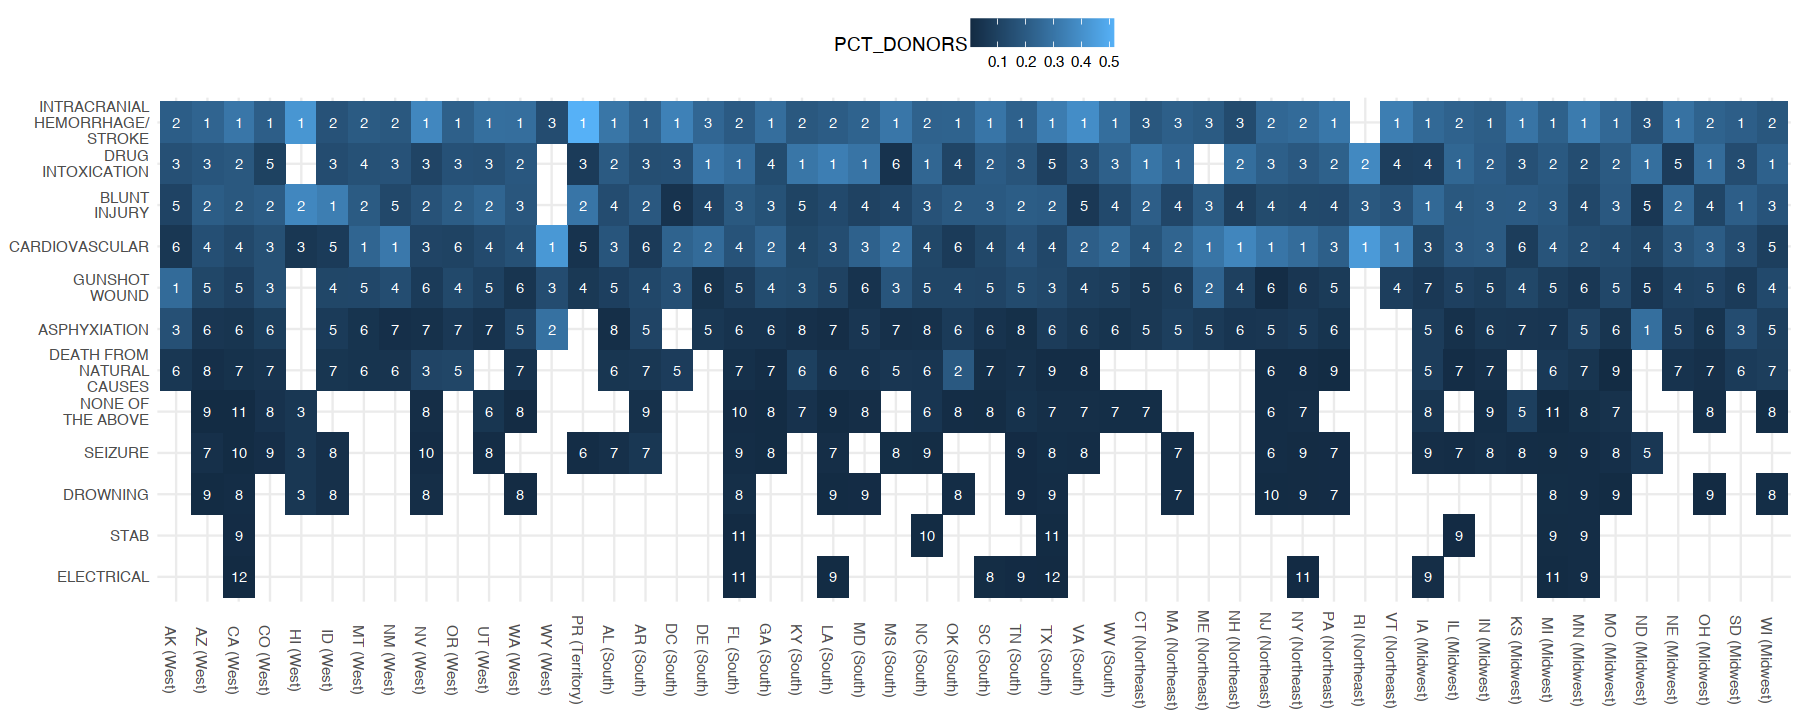

In [12]:
options(repr.plot.width = 15, repr.plot.height = 6)

transplant %>%
  filter(!is.na(DON_HOSPITAL_STATE)) %>%
  filter(REC_TX_DT_YEAR %in% 2018:2021) %>%
  left_join(state_code_mapping %>% select(STATE_CODE, STATE_REGION), 
            by = c("DON_HOSPITAL_STATE" = "STATE_CODE")) %>%
  count(REC_TX_DT_YEAR, DON_HOSPITAL_STATE, DON_HOSPITAL_REGION = STATE_REGION, DON_DEATH_MECH, sort = T, name = "N_DONORS") %>%
  group_by(REC_TX_DT_YEAR, DON_HOSPITAL_STATE) %>%
  mutate(PCT_DONORS = N_DONORS / sum(N_DONORS),
         RANK_DONORS = rank(-N_DONORS, ties.method = "min")) %>%
  ungroup() %>%
  filter(REC_TX_DT_YEAR == 2021) %>%
  mutate(DON_DEATH_MECH = gsub("^[0-9]+: ", "", DON_DEATH_MECH),
         DON_HOSPITAL_STATE = fct_reorder2(paste0(DON_HOSPITAL_STATE, " (", DON_HOSPITAL_REGION, ")"),
                                           DON_HOSPITAL_STATE, DON_HOSPITAL_REGION)) %>%
  group_by(DON_DEATH_MECH) %>%
  mutate(N_DONOR_TOTAL = sum(N_DONORS)) %>%
  ungroup() %>%
  mutate(DON_DEATH_MECH = stringr::str_wrap(DON_DEATH_MECH, 10),
         DON_DEATH_MECH = fct_reorder(DON_DEATH_MECH, N_DONOR_TOTAL)) %>%
  ggplot(aes(x = DON_HOSPITAL_STATE, y = DON_DEATH_MECH, 10)) +
  geom_tile(aes(fill = PCT_DONORS)) +
  geom_text(aes(label = RANK_DONORS), color = "white", size = 3) +
  scale_x_discrete(name = NULL) +
  scale_y_discrete(name = NULL) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = -90),
        legend.position = "top")

filter: removed 342 rows (1%), 32,398 rows remaining



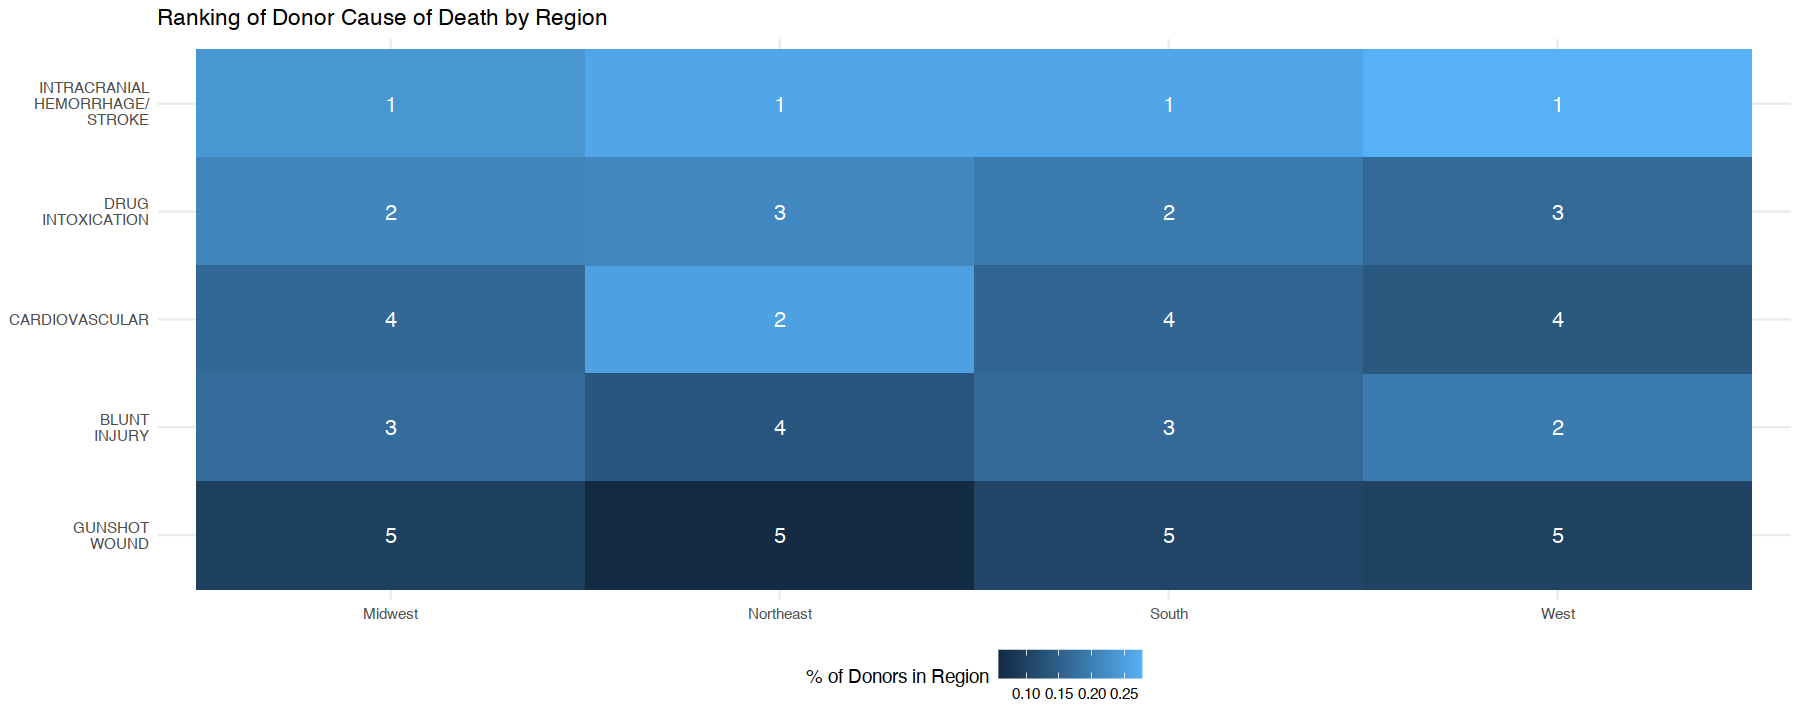

In [13]:
options(repr.plot.width = 15, repr.plot.height = 6)

transplant %>%
  filter(!is.na(DON_HOSPITAL_STATE)) %>%
  tidylog::filter(!grepl("PR|VI", DON_HOSPITAL_STATE)) %>%
  filter(REC_TX_DT_YEAR %in% 2018:2021) %>%
  left_join(state_code_mapping %>% select(STATE_CODE, STATE_REGION), 
            by = c("DON_HOSPITAL_STATE" = "STATE_CODE")) %>%
  count(REC_TX_DT_YEAR, DON_HOSPITAL_REGION = STATE_REGION, DON_DEATH_MECH, sort = T, name = "N_DONORS") %>%
  group_by(REC_TX_DT_YEAR, DON_HOSPITAL_REGION) %>%
  mutate(PCT_OF_DONORS = N_DONORS / sum(N_DONORS),
         RANK_DONORS = rank(-N_DONORS, ties.method = "min")) %>%
  filter(rank(-N_DONORS) <= 5) %>%
  ungroup() %>%
  arrange(REC_TX_DT_YEAR, DON_HOSPITAL_REGION, -N_DONORS) %>%
  filter(REC_TX_DT_YEAR == 2021) %>%
  mutate(DON_DEATH_MECH = gsub("^[0-9]+: ", "", DON_DEATH_MECH)) %>%
  group_by(DON_DEATH_MECH) %>%
  mutate(N_DONOR_TOTAL = sum(N_DONORS)) %>%
  ungroup() %>%
  mutate(DON_DEATH_MECH = stringr::str_wrap(DON_DEATH_MECH, 10),
         DON_DEATH_MECH = fct_reorder(DON_DEATH_MECH, N_DONOR_TOTAL)) %>%
  ggplot(aes(x = DON_HOSPITAL_REGION, y = DON_DEATH_MECH)) +
  geom_tile(aes(fill = PCT_OF_DONORS)) +
  geom_text(aes(label = RANK_DONORS), color = "white", size = 4.5) +
  scale_x_discrete(name = NULL) +
  scale_y_discrete(name = NULL) +
  scale_fill_continuous(name = "% of Donors in Region") +
  labs(title = "Ranking of Donor Cause of Death by Region") +
  theme_minimal() +
  theme(legend.position = "bottom")

---

### Analysis of national + regional causes of death

Using CDC Wonder data on the top 15 causes of death and drug and alcohol related deaths in 2020.

The queries for pulling these tables are:

- [Top 15 leading causes of death, 2020, National](https://wonder.cdc.gov/controller/saved/D76/D328F478)
- [Top 15 leading causes of death, 2020, Midwest](https://wonder.cdc.gov/controller/saved/D76/D328F479)
- [Top 15 leading causes of death, 2020, South](https://wonder.cdc.gov/controller/saved/D76/D328F480)
- [Drug and alcohol induced deaths, 2020, National](https://wonder.cdc.gov/controller/saved/D76/D328F477)
- [Drug and alcohol induced deaths, 2020, by region](https://wonder.cdc.gov/controller/saved/D76/D328F476)

In [14]:
setwd(data_path)

cdc_wonder.top15_leading_cod <- lapply(c("National", "Midwest", "South"), function(r) {
  read.table(glue::glue("raw/05_cdc_wonder/causes_of_death/cdc_wonder_15_leading_causes_of_death_{tolower(r)}_2020.txt"),
             fill = T, sep = "\t", header = T) %>%
    mutate(region = r)
}) %>%
  data.table::rbindlist() %>%
  janitor::clean_names() %>%
  filter(notes == "") %>%
  select(region, x15_leading_causes_of_death, deaths, population, crude_rate)

cdc_wonder.drug_alcohol_induced_deaths.national <- read.table("raw/05_cdc_wonder/causes_of_death/cdc_wonder_drug_alcohol_induced_deaths_national_2020.txt",
                                                              fill = T, sep = "\t", header = T) %>% 
  as_tibble() %>%
  janitor::clean_names() %>%
  filter(notes == "") %>%
  select(drug_alcohol_induced, deaths, population, crude_rate)

cdc_wonder.drug_alcohol_induced_deaths.region <- read.table("raw/05_cdc_wonder/causes_of_death/cdc_wonder_drug_alcohol_induced_deaths_byRegion_2020.txt",
                                                            fill = T, sep = "\t", header = T) %>% 
  as_tibble() %>%
  janitor::clean_names() %>%
  filter(notes == "") %>%
  select(census_region, drug_alcohol_induced, deaths, population, crude_rate)

setwd(analysis_path)

In [15]:
cdc_wonder.top15_leading_cod %>%
  filter(grepl("Cerebrovascular", x15_leading_causes_of_death))

region,x15_leading_causes_of_death,deaths,population,crude_rate
<chr>,<chr>,<int>,<int>,<dbl>
National,#Cerebrovascular diseases (I60-I69),159990,256662010,62.3
Midwest,#Cerebrovascular diseases (I60-I69),35770,53048283,67.4
South,#Cerebrovascular diseases (I60-I69),67056,98131517,68.3


CDC data shows that the crude death rate of "Cerebrovascular diseases" (which are [most commonly strokes](https://www.healthline.com/health/cerebrovascular-disease)) among adults is 62.3 people out of 100,000 on a national average. In the Midwest and South, that is 67.4 and 68.3 out of 100,000, respectively, both higher than the national average.

In [16]:
bind_rows(cdc_wonder.drug_alcohol_induced_deaths.national %>% 
            mutate(census_region = "National", .before = everything()),
          cdc_wonder.drug_alcohol_induced_deaths.region) %>%
  filter(grepl("National|Midwest|South", census_region),
         drug_alcohol_induced == "Drug-induced causes")

census_region,drug_alcohol_induced,deaths,population,crude_rate
<chr>,<chr>,<int>,<int>,<dbl>
National,Drug-induced causes,95359,256662010,37.2
Census Region 2: Midwest,Drug-induced causes,20285,53048283,38.2
Census Region 3: South,Drug-induced causes,36697,98131517,37.4


CDC data shows that the crude death rate of drug induced causes among adults is 37.2 people out of 100,000 on a national average. In the Midwest and South, that is 38.3 and 37.4 out of 100,000, respectively, both higher than the national average.